Importing Relevant Libraries:

In [ ]:
!pip install --upgrade gensim
from gensim.models import Word2Vec
import pandas as pd
import nltk
nltk.download('punkt')
import numpy as np
import re

     |████████████████████████████████| 24.2MB 170kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Importing data:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ONGO.csv to ONGO (2).csv


In [ ]:
import io
data_ongo = pd.read_csv(io.BytesIO(uploaded['ONGO.csv']))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tweet.csv to tweet (3).csv


In [ ]:
import io
data_tweet = pd.read_csv(io.BytesIO(uploaded['tweet.csv']))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving reddit.csv to reddit (2).csv


In [ ]:
import io
data_reddit = pd.read_csv(io.BytesIO(uploaded['reddit.csv']))

Getting sense of data:

In [ ]:
data_reddit.head(5)

,text,hate,offensive,ok
0,go back to your castle you capitalist scum htt...,1,0,0
1,i found her here http perfectredheads tumblr c...,1,0,0
2,this slut gonna fuck with all http righpatcour...,1,0,0
3,this girl gonna go into on your knees open her...,1,0,0
4,attention reddit mods http www youtube com wat...,1,0,0


In [ ]:
data_tweet.head(5)

,text,hate,offensive,ok
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,0,1
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0,1,0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0,1,0
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0,1,0
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0,1,0


In [ ]:
data_ongo.head(5)

,text
0,Hello!
1,Gotta get those zzzs!
2,go!
3,go ongo go
4,"Hey, can't wait to release the new version. Ne..."


Tokenization using NLTK:

In [ ]:
def clean_text(text):
    #text = text.lower()
    text = re.sub(r"what's","what is", text)
    text = re.sub(r"rt", '',text)
    text = re.sub(r"\'ve","have", text)
    text = re.sub(r"can't","cannot",text)
    text = re.sub(r"n't", "not", text)
    text = re.sub(r"i'm","i am", text)
    text = re.sub(r"\'re'","are", text)
    text = re.sub(r"\'d'","would",text)
    text = re.sub(r"\'ll'", "will", text)
    text = re.sub(r"\'scuse'", "excuse", text)
    text = re.sub("\W",' ', text)
    text = re.sub('\s+',' ',text)
    text = text.strip(' ')
    return text
data_ongo['cmt'] = data_ongo['text'].map(lambda x: clean_text(x))
data_reddit['cmt'] = data_reddit['text'].map(lambda x: clean_text(x))
data_tweet['cmt'] = data_tweet['text'].map(lambda x: clean_text(x))

tokens_ongo=[nltk.word_tokenize(words) for words in data_ongo['cmt']]
tokens_reddit=[nltk.word_tokenize(words) for words in data_reddit['cmt']]
tokens_tweet=[nltk.word_tokenize(words) for words in data_tweet['cmt']]
print(tokens_ongo)

[['Hello'], ['Got', 'ta', 'get', 'those', 'zzzs'], ['go'], ['go', 'ongo', 'go'], ['Hey', 'can', 'not', 'wait', 'to', 'release', 'the', 'new', 'version', 'Newsfeed', 'should', 'get', 'come', 'alive', 'with', 'photos'], ['Good', 'job'], ['Hahaha', 'finding', 'bugs', 'is', 'progress'], ['That', 's', 'a', 'scenic', 'workout', 'spot'], ['lol'], ['That', 'looks', 'fun'], ['That', 's', 'a', 'really', 'good', 'idea'], ['Whoa', 'That', 's', 'awesome', 'guys'], ['Yeah', 'I', 'decided', 'to', 'run', 'and', 'do', 'some', 'strength', 'training', 'for', 'fun', 'day'], ['Oooh', 'nice'], ['Looks', 'like', 'we', 'found', 'another', 'bug'], ['Nice', 'Keep', 'it', 'going'], ['Wow', 'nice'], ['that', 's', 'awesome'], ['Almost', 'there'], ['Nice', 'gainz'], ['adding', 'a', 'new', 'comment'], ['Got', 'ta', 'get', 'those', 'gainz'], ['Yeah', 'I', 'usually', 'dread', 'them', 'but', 'it', 's', 'not', 'so', 'bad', 'if', 'you', 're', 'only', 'doing', 'it', 'for', '20', 'seconds'], ['I', 'm', 'savoring', 'the', '

**Word2Vec:**

In [ ]:
model_ongo = Word2Vec(tokens_ongo,size=70,sg=1,min_count=3)
model_reddit = Word2Vec(tokens_reddit,size=70,sg=1,min_count=3)
model_tweet = Word2Vec(tokens_tweet,size=70,sg=1,min_count=3)

model_ongo["the"]

NameError: ignored

Further, we will store all the word vectors in the data frame with 70 dimensions and use this data frame for PCA.

In [ ]:
words_ongo=list(model_ongo.wv.vocab)
words_reddit=list(model_reddit.wv.vocab)
words_tweet=list(model_tweet.wv.vocab)


print(words_reddit)

['go', 'back', 'to', 'your', 'castle', 'you', 'capitalist', 'scum', 'http', 'imgur', 'com', 'dz7zyuu', 'i', 'found', 'her', 'here', 'perfectredheads', 'tumblr', 'post', '147639637731', 'this', 'slut', 'gon', 'na', 'fuck', 'with', 'all', 'righpatcouter1987', 'girl', 'into', 'on', 'knees', 'open', 'legs', 'and', 'url', 'rlku', 'me', 'do63', 'attention', 'reddit', 'mods', 'www', 'youtube', 'watch', 'v', 'hivrkjod1f8', 'now', 'a', 'man', 'https', '9hsj', '2shbqy', 'dont', 'like', 'senpai', 'ncjyh7u', 'jpg', 'bitch', 'wife', 'pow', 'minidonks', '02foals', 'riffraff', 'riffraffaug08rearwa', 'wild', 'rare', 'pepe', 'appeared', '8wxpcoi', 'im', 'bot', 'user', 'pepebot_dev', 'source', 'tampersanda', '145978442917', 'ass', 'workout', 'ball', 'oil', 'gabriella', 'paltrova', 'kristina', 'rose', '141956352727', 'call', 'the', 'tagger', 'my', 'dick', 'have', 'sex', 'absolutly', 'kitties', 'be', 'looser', 'aermuckcon1976', 'naughty', 'boobs', 'wait', 'sporimssigta1988', 'raconchildbab1970', 'come', '

In [ ]:
X_ongo=model_ongo[model_ongo.wv.vocab]
X_reddit=model_reddit[model_reddit.wv.vocab]
X_tweet=model_tweet[model_tweet.wv.vocab]
X_ongo=model_ongo[model_ongo.wv.vocab]

x_ongo_tweet = model_tweet[model_tweet.wv.vocab]

df_ongo=pd.DataFrame(X_ongo)
print(df_ongo.head(5))
df.shape


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


         0         1         2   ...        47        48        49
0 -0.009710 -0.112115  0.045909  ... -0.075824 -0.645397 -0.096301
1 -0.107245 -0.248288 -0.076773  ... -0.159828 -0.651514 -0.299764
2 -0.282957 -0.317946 -0.098019  ... -0.237273 -0.739055 -0.288552
3  0.008565 -0.191034 -0.010288  ... -0.248335 -0.821280 -0.558566
4 -0.350003 -0.370129  0.126200  ... -0.330905 -0.656811 -0.288628

[5 rows x 50 columns]


(10429, 50)

We will be implementing PCA using the numpy library

In [ ]:
#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X_ongo=np.dot(X_ongo,new_vectors)
neww_X_reddit=np.dot(X_reddit,new_vectors)
neww_X_tweet=np.dot(X_tweet,new_vectors)

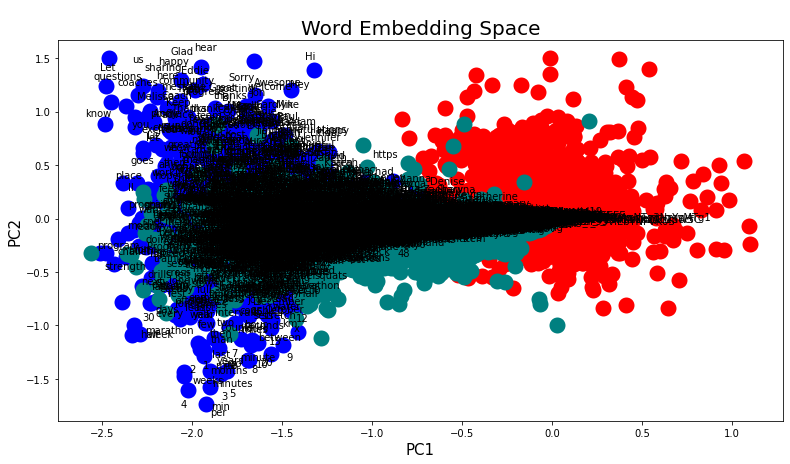

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(neww_X_ongo[:,0],neww_X_ongo[:,1],linewidths=10,color='blue')
plt.scatter(neww_X_reddit[:,0],neww_X_reddit[:,1],linewidths=10,color='red')
plt.scatter(neww_X_tweet[:,0],neww_X_tweet[:,1],linewidths=10,color='teal')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

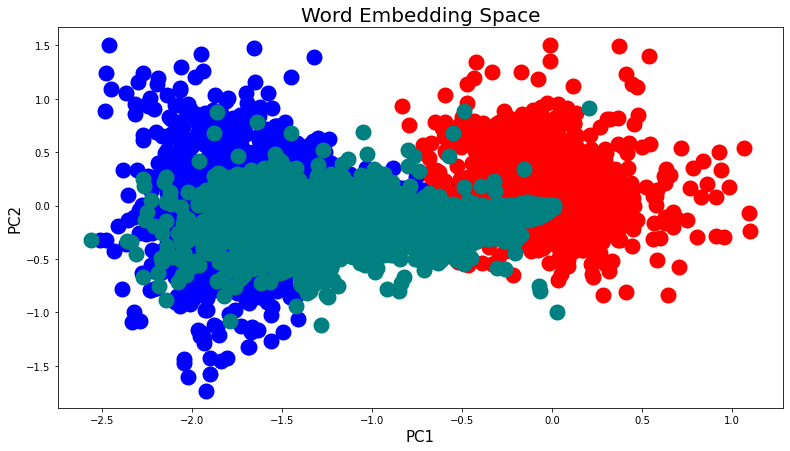

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(neww_X_ongo[:,0],neww_X_ongo[:,1],linewidths=10,color='blue')
plt.scatter(neww_X_reddit[:,0],neww_X_reddit[:,1],linewidths=10,color='red')
plt.scatter(neww_X_tweet[:,0],neww_X_tweet[:,1],linewidths=10,color='teal')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.vocab)
#for i, word in enumerate(vocab):
#  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))